In [129]:
%config IPCompleter.greedy=True  # setting autocomplete 

from sklearn import datasets
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 

# load the pre-existing iris dataset
iris = datasets.load_iris()

X = iris.data
y = iris.target

print(X.shape, y.shape)

(150, 4) (150,)


In [96]:
# To split training and testig data

from sklearn.model_selection import train_test_split

X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape)

(120, 4)


In [97]:
# implementing KNN 

from sklearn import neighbors, metrics 
from sklearn.preprocessing import LabelEncoder 

data = pd.read_csv('car.data')
print(data.head())

  buying maintainance doors persons lug_boot safety  class
0  vhigh        vhigh     2       2    small    low  unacc
1  vhigh        vhigh     2       2    small    med  unacc
2  vhigh        vhigh     2       2    small   high  unacc
3  vhigh        vhigh     2       2      med    low  unacc
4  vhigh        vhigh     2       2      med    med  unacc


In [98]:
X = data[[
    'buying',
    'maintainance',
    'safety'
]].values

y = data[['class']]

# print(X,y)

In [99]:
# Converting the categorical colums into numbers

Le = LabelEncoder()

for i in range(len(X[0])):
    X[:,i] = Le.fit_transform(X[:,i])

# print(X)

# Another way of converting is using a dictionary and call the map method 

label_mapping = {
    'unacc' : 0,
    'acc' : 1,
    'good' : 2,
    'vgood' : 3,
}

y.loc[:,'class'] = y['class'].map(label_mapping)
y = np.array(y)

# Creating KNN model

knn = neighbors.KNeighborsClassifier(n_neighbors=25,weights='uniform')
knn.fit(X_train, y_train)

prediction = knn.predict(X_test)

accuracy = metrics.accuracy_score(y_test, prediction)
print(F"Accuracy of machine learning model = {accuracy}")


Accuracy of machine learning model = 0.9333333333333333


/home/sankethbk7777/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [125]:
# Support Vector Machines 
from sklearn import svm

X = iris.data
y = iris.target
X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size = 0.2)

classes = ["Iris Setosa", "Iris Versicolour", "Iris Virginica"]
model = svm.SVC()

model.fit(X_train, y_train)
prediction = model.predict(X_test)
accuracy = metrics.accuracy_score(prediction, y_test)

print(F"Accuracy of SVM in iris dataset is {accuracy}")

Accuracy of SVM in iris dataset is 0.9666666666666667


R**2 value 0.7372137988586844
[  0.86528091  -4.68837216   2.11829221 -15.78461205   0.98633606
   3.79764042   2.52067777  -1.81210673  -1.14251175  -1.12798837
   3.52770171  -2.71576204  -0.28019747  -0.90116119   2.02880306
  -2.52445481   5.32834357   6.33850901   5.92206562   2.81353288
   0.91260323   2.87679139   5.29896834   0.49421701   0.3635297
  -2.55601188   1.71323136   6.64574289  -0.81003269   4.85541952
  -0.33810241   0.34244965  -5.1797308    3.25510059 -17.17749191
   6.73543604  -0.36611916   2.18200574  -6.11661979  -0.28691395
   1.82032276   4.122062     4.62513272  -0.44885865   3.08489691
   0.85892081   5.01609428  -1.38026264   0.04506618  -4.10357339
   4.29151084   1.9848184    2.93615455   0.33274834  -0.95709718
 -13.76040106  -1.23106065  -4.27704191  -0.99339012   0.08734121
   5.44949951   1.97841875  -0.20766305   1.24376096   2.94236309
   3.64070917 -12.2137322  -28.3409957    0.65217558   7.00702467
  -2.85740164  -0.18535203   7.61796576  -0.421

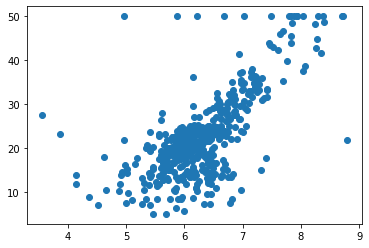

In [146]:
# Linear regression 

from sklearn import linear_model

boston = datasets.load_boston()

X = boston.data
y = boston.target 

l_reg = linear_model.LinearRegression()
plt.scatter(X.T[5],y)

X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = l_reg.fit(X_train, y_train)
prediction = model.predict(X_test)

print(F"R**2 value {l_reg.score(X,y)}")

# print(prediction - y_test)

In [ ]:
# KMeans clustering 

from sklearn.datasets import load_breast_cancer 
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale 

bc = load_breast_cancer()
X = scale(bc.data)
y = bc.target 
